In [1]:
import numpy.linalg as linalg
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook

## Physical constants

In [2]:
m_p = 1.6726e-27 #proton mass, kg
m_n = 1.6749e-27 #neutron mass, kg
m_t = m_p+2*m_n
q_p = 1.6e-19 #proton charge, C

c = 2.99792e8 #speed of light m/s
eps_0 = 8.854e-12 #permitivity of free space F/m

B_0 = np.array((0,0,1))

w_ct = q_p*linalg.norm(B_0)/m_t
f_ct = w_ct/(2*np.pi)
T_ct = 1/f_ct


In [3]:
# Magnetic field, electric field
from numpy.random import uniform

w1 = (uniform(2,8))*w_ct
w2 = (uniform(3,6))*w_ct
w = w_ct
#4.83e+00,  5.81e+00 very intersting

def getB(t):
    B = B_0# + np.array([0,0,4*np.cos(3.17*w_ct*t)])
    #print(f"t: {t}, B: {B}")
    return B
def getE(t):
    return np.zeros(3) + .1*np.array((-np.sin(w*t), -np.cos(w*t), 0)) 

def step(t):
    return np.floor(t/T_ct)

In [4]:
def lorentz(t, X):
    v = X[3:]
    drdt = v
    dvdt = q_p/m_t * (getE(t) + np.cross(v, getB(t)))
    
    return np.array([drdt, dvdt]).flatten()
    
def getLarmor(v,t):
    vnorm = linalg.norm(v)
    Bnorm = linalg.norm(getB(t))
    
    dotProd = np.abs(np.dot(v,getB(t)))
    
    v_perp = np.sqrt(vnorm**2 - dotProd**2/Bnorm**2)
    r_L = v_perp*m_t/(q_p*Bnorm)
    
    return r_L

In [5]:
v_0 = np.array([0,-1,0])
r_L0 = getLarmor(v_0,0)
r_0 = np.array([r_L0,0,0])

def getPhaseSpaceValues(t):
    
    results = integrate.solve_ivp(lorentz, (0, t), np.array([r_0,v_0]).flatten(), max_step = 1e-9, method = 'LSODA')
    
    return results

In [6]:
traj = getPhaseSpaceValues(10*T_ct)
xs = traj['y'][0]
ys = traj['y'][1]
zs = traj['y'][2]
vxs = traj['y'][3]
vys = traj['y'][4]
vzs = traj['y'][5]
ts = traj['t']

Es = [getE(t) for t in ts]
Bs = [getB(t) for t in ts]#getB(ts)


v_f = np.array([vxs[-1], vys[-1], vzs[-1]])
r_Lf = linalg.norm([xs[-1],ys[-1],0])

<IPython.core.display.Javascript object>


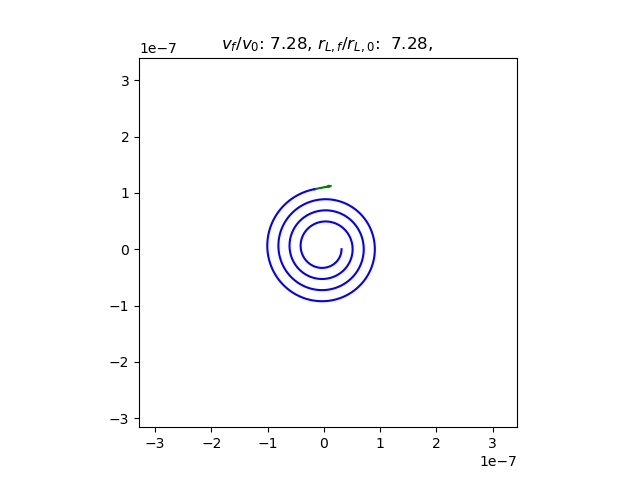

In [7]:
%matplotlib notebook
fig, ax = plt.subplots()

ax.set_title(f"$v_{{f}}/v_{{0}}$: {linalg.norm(v_f)/linalg.norm(v_0):.2f}, $r_{{L,f}}/r_{{L,0}}$: {r_Lf/r_L0: .2f}, ")

traj, = ax.plot(xs[:1],ys[:1], color = 'b')
  
patch0 = plt.Arrow(xs[0],ys[0], Es[0][0], Es[0][1])
patch1 = plt.Arrow(xs[0],ys[0], Bs[0][0], Bs[0][1])
ax.add_patch(patch0)
ax.add_patch(patch1)

def animation_frame(i):
    traj.set_xdata(xs[:1+i])
    traj.set_ydata(ys[:1+i])
    
    ax.patches = []
    
    E = Es[i]
    B = Bs[i]
    
    E_norm = linalg.norm(E)
    B_norm = linalg.norm(B)
    patch0 = plt.Arrow(xs[i],ys[i], E[0]*r_L0/(E_norm), E[1]*r_L0/(E_norm), width = r_L0/5, color = 'g')
    patch1 = plt.Arrow(xs[i],ys[i], B[0]*r_L0/(B_norm), B[1]*r_L0/(B_norm), width = r_L0/5, color = 'r')
    
    ax.add_patch(patch0)
    ax.add_patch(patch1)
    
    return traj

ani = FuncAnimation(fig, func = animation_frame, frames = np.arange(1,len(xs)+1,1), interval = 3, repeat = True)


ax.set_xlim([1.5*min(xs), 1.5*max(xs)])
ax.set_ylim([1.5*min(ys), 1.5*max(ys)])
ax.set_aspect(1)
plt.show()

In [8]:
print(f"w1,w2:{w1/w_ct: .2e}, {w2/w_ct: .2e}")

w1,w2: 4.86e+00,  4.90e+00
